# Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#batch size is like a hyperparater, not fixed.
#increase in batch size better updates
#normal problem random sampling is enough, batch is for stable training
#32 to 64, may sometimes depend on classes
#number of samples to work before updating internal models

#eopch number of times algorithim will work through entire training data set
#epoch has one or more batch 

In [3]:
batch_size = 40
image_size = 200
epochs = 5
channels = 3

In [4]:
data_dir=r'D:\DATA SCEINCE\1. GL\9. FINAL SORTED PROJECT\DEEP_LEARNING_fOREST\FD-CV\fire_dataset'

# import file

In [5]:
df_c = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(image_size , image_size ),
  batch_size=batch_size)

Found 999 files belonging to 2 classes.


# read image

In [6]:
#cb
for image_batch, labels_batch in df_c.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(40, 200, 200, 3)
[1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 1 1 0]


In [22]:
class_names = df_c.class_names
class_names

['fire_images', 'non_fire_images']

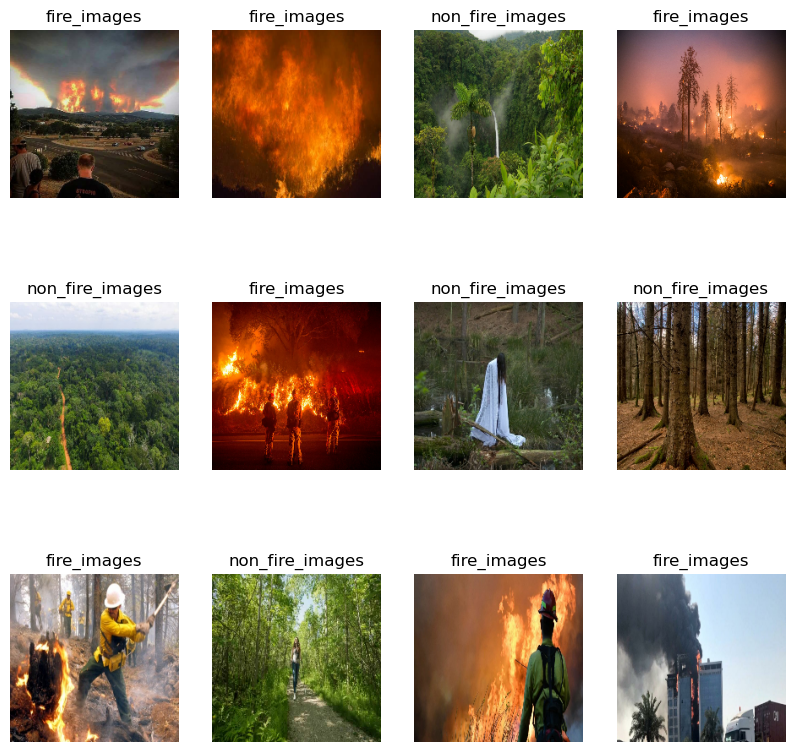

In [28]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in df_c.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# train-test 

In [7]:
#cb
train=ImageDataGenerator(
     rescale=1.0/200,
    horizontal_flip=True,
    rotation_range=10
)

test=ImageDataGenerator(
     rescale=1.0/200,
    horizontal_flip=True,
    rotation_range=10
)
val=ImageDataGenerator(
     rescale=1.0/200,
    horizontal_flip=True,
    rotation_range=10
)
#train = ImageDataGenerator(rescale=1/255)
#test = ImageDataGenerator(rescale=1/255)

In [ ]:
import splitfolders
splitfolders.ratio(data_dir, output="output", seed=1337, ratio=(.7, 0.2,0.1)) 

In [8]:
train_dataset = train.flow_from_directory(r"C:\Users\user\9. FINALISED_PROJECTS_RESUME\FOREST_FIRE\output\train",
                                          target_size=(200,200),
                                          batch_size = 40,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\user\9. FINALISED_PROJECTS_RESUME\FOREST_FIRE\output\test",
                                          target_size=(200,200),
                                          batch_size =40,
                                          class_mode = 'binary')
valid_dataset = val.flow_from_directory(r"C:\Users\user\9. FINALISED_PROJECTS_RESUME\FOREST_FIRE\output\val",
                                          target_size=(200,200),
                                          batch_size =40,
                                          class_mode = 'binary')

Found 698 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [46]:
#other 
#ONLY TWO IS POSSIBLE
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_size , image_size ),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_size , image_size ),
  batch_size=batch_size)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


# build CNN

In [9]:
batch_size = 40
image_size = 200
epochs = 5
channels = 3

In [10]:
from tensorflow.keras import models, layers

In [11]:
input_shape = ( image_size, image_size, channels)
n_classes = 2

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [14]:
model.fit(train_dataset,
          steps_per_epoch=15,
          batch_size=40,
          validation_data=valid_dataset,
          validation_steps=5,
          epochs=5
    )

Epoch 1/5
15/15 [==============================] - 118s 7s/step - loss: 0.6025 - accuracy: 0.7474 - val_loss: 0.4810 - val_accuracy: 0.7588
Epoch 2/5
15/15 [==============================] - 94s 7s/step - loss: 0.3860 - accuracy: 0.7561 - val_loss: 0.3549 - val_accuracy: 0.7588
Epoch 3/5
15/15 [==============================] - 90s 6s/step - loss: 0.3157 - accuracy: 0.7803 - val_loss: 0.3150 - val_accuracy: 0.8744
Epoch 4/5
15/15 [==============================] - 104s 7s/step - loss: 0.2684 - accuracy: 0.9204 - val_loss: 0.2477 - val_accuracy: 0.9497
Epoch 5/5
15/15 [==============================] - 91s 6s/step - loss: 0.2383 - accuracy: 0.9367 - val_loss: 0.2372 - val_accuracy: 0.9347


# scores

history

In [17]:
model.history.params
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

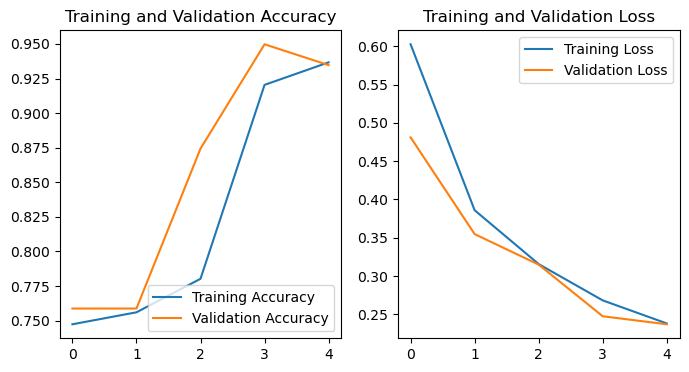

In [18]:

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']



plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
#hopefully if more epovh were given we would have get good result

In [12]:
#what is two values
scores=model.evaluate(test_dataset)
scores

3/3 [==============================] - 17s 6s/step - loss: 0.0878 - accuracy: 0.9902


[0.08779186010360718, 0.9901960492134094]